In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools


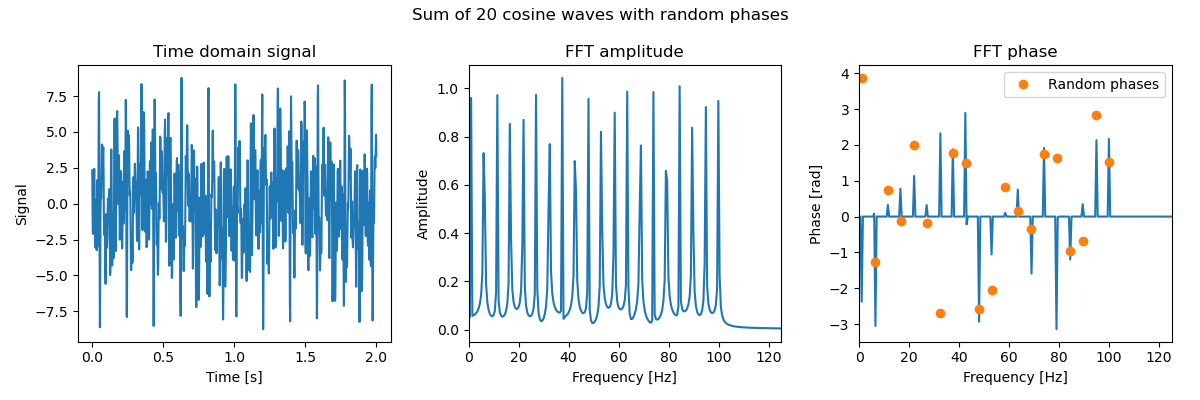

In [20]:
nb_freq = 20
np.random.seed(6541)
frequencies = np.linspace(1, 100, nb_freq)
random_phases = np.random.normal(loc=0, scale=2, size=nb_freq)
t = np.linspace(0,2,1000)

signal = np.sum(np.cos(2 * np.pi * frequencies[:, np.newaxis] * t + random_phases[:, np.newaxis]), axis=0)

F, A, P = tools.FFT(t, signal)
P[A < 0.5] = 0
P = np.deg2rad(P)

fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.suptitle(f"Sum of {nb_freq} cosine waves with random phases")
ax[0].plot(t, signal)
ax[1].plot(F, A)
ax[2].plot(F, P)
ax[1].set_xlim(0, 125)
ax[2].set_xlim(0, 125)
ax[2].plot(frequencies, random_phases, 'o', label = 'Random phases')
ax[2].legend()
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal')
ax[0].set_title('Time domain signal')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('FFT amplitude')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_title('FFT phase')

fig.tight_layout()


In [15]:
frequencies

array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ])